In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")

In [230]:
df=pd.read_excel('Jan_to_Jun_2018_data.xlsx')

In [231]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Month_of_issue,year_of_issue
0,256626,NaN,NaN,11500,11500,11500.0,36 months,7.46,357.52,A,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Jun,2018
1,256636,NaN,NaN,6000,6000,6000.0,36 months,22.90,231.95,E,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Jun,2018
2,256639,NaN,NaN,10000,10000,10000.0,36 months,20.39,373.63,D,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Jun,2018
3,256668,NaN,NaN,25000,25000,25000.0,36 months,13.06,843.08,C,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Jun,2018
4,256681,NaN,NaN,10000,10000,10000.0,36 months,14.52,344.31,C,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Jun,2018


In [232]:
df.drop(['Unnamed: 0','Month_of_issue', 'year_of_issue'],axis=1,inplace=True)

In [233]:
data=df.copy()

# TARGET - Loan_Status

Let us keep the target aside and only analyse on the features

In [234]:
df['loan_status'].value_counts(1)

Fully Paid     0.822767
Charged Off    0.177233
Name: loan_status, dtype: float64

In [235]:
y=df['loan_status']

In [236]:
y.shape

(35648,)

In [237]:
y.replace({'Fully Paid':0,'Charged Off':1},inplace=True)

# Data Cleaning, Analysing the features for null values

In [238]:
X=df.drop('loan_status',axis=1)

In [239]:
X.shape

(35648, 144)

In [240]:
X.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,11500,11500,11500.0,36 months,7.46,357.52,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6000,6000,6000.0,36 months,22.90,231.95,E,E1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,36 months,20.39,373.63,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,36 months,13.06,843.08,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10000,10000,10000.0,36 months,14.52,344.31,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Info

In [241]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35648 entries, 0 to 35647
Columns: 144 entries, id to settlement_term
dtypes: float64(58), int64(53), object(33)
memory usage: 39.2+ MB


## Duplicate Check

In [242]:
X.duplicated()[X.duplicated()==True]

Series([], dtype: bool)

#### No duplicates in the dataset

In [243]:
pd.set_option('display.max_rows', 200)

## Describe

In [244]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,35648.0,15103.263156,10176.221486,1000.00,7000.0000,12000.000000,20000.000000,4.000000e+04
funded_amnt,35648.0,15103.263156,10176.221486,1000.00,7000.0000,12000.000000,20000.000000,4.000000e+04
funded_amnt_inv,35648.0,15099.753132,10175.057498,1000.00,7000.0000,12000.000000,20000.000000,4.000000e+04
int_rate,35648.0,13.248171,5.452863,5.31,9.4400,12.610000,16.020000,3.094000e+01
installment,35648.0,449.648669,294.164771,30.12,227.4400,366.100000,615.900000,1.628080e+03
annual_inc,35648.0,79148.582852,80503.080636,0.00,46000.0000,65479.000000,95000.000000,9.300000e+06
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
desc,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
X.describe(include='object').T

,count,unique,top,freq
term,35648,2,36 months,25938
grade,35648,7,B,9833
sub_grade,35648,34,B5,2175
emp_title,32493,15408,Manager,646
emp_length,32544,11,10+ years,11970
home_ownership,35648,4,MORTGAGE,17859
verification_status,35648,3,Source Verified,14265
issue_d,35648,6,Jan-2018,7681
pymnt_plan,35648,1,n,35648
purpose,35648,13,debt_consolidation,17883


## Unique Values

In [246]:
def unique_val(df):
    feature=[]
    unique=[]
    nunique=[]
    for i in df.columns:
        feature.append(i)
        unique.append(df[i].unique())
        nunique.append(df[i].nunique())
    feature_s=pd.Series(feature)
    unique_s=pd.Series(unique)
    nunique_s=pd.Series(nunique)
    
    unique_val=pd.concat([feature_s,unique_s,nunique_s],axis=1).rename(columns={0:'Feature',1:'Unique Values',2:'No. of unique values'})
    return (unique_val)

In [247]:
unique_val(X)

,Feature,Unique Values,No. of unique values
0,id,[nan],0
1,member_id,[nan],0
2,loan_amnt,"[11500, 6000, 10000, 25000, 34700, 24000, 2415...",1140
3,funded_amnt,"[11500, 6000, 10000, 25000, 34700, 24000, 2415...",1140
4,funded_amnt_inv,"[11500.0, 6000.0, 10000.0, 25000.0, 34700.0, 2...",1201
5,term,"[ 36 months, 60 months]",2
6,int_rate,"[7.46, 22.9, 20.39, 13.06, 14.52, 30.75, 6.83,...",74
7,installment,"[357.52, 231.95, 373.63, 843.08, 344.31, 1138....",8131
8,grade,"[A, E, D, C, F, B, G]",7
9,sub_grade,"[A4, E1, D4, C1, C3, F5, A3, C5, C2, D5, D3, A...",34


## Data cleaning

In [248]:
X['term'].replace({' 36 months':'36_months',' 60 months':'60_months'},inplace=True)

### Dropping the features which will come into play only after the loan is sanctioned

Those features include: collection_recovery_fee,funded_amnt,funded_amnt_inv,last_pymnt_amnt,last_pymnt_d,out_prncp 
 out_prncp_inv
 pymnt_plan
 recoveries
 total_pymnt
 total_pymnt_inv
 total_rec_int
 total_rec_late_fee
 total_rec_prncp
 hardship_flag
 hardship_type
 hardship_reason
 hardship_status
 deferral_term
 hardship_amount
 hardship_start_date
 hardship_end_date
 payment_plan_start_date
 hardship_length
 hardship_dpd
 hardship_loan_status
 orig_projected_additional_accrued_interest
 hardship_payoff_balance_amount
 hardship_last_payment_amount
 disbursement_method
 debt_settlement_flag
 debt_settlement_flag_date
 settlement_status
 settlement_date
 settlement_amount
 settlement_percentage
 settlement_term


In [249]:
X.drop(['collection_recovery_fee','funded_amnt','funded_amnt_inv','last_pymnt_amnt','last_pymnt_d','out_prncp', 
 'out_prncp_inv',
 'pymnt_plan',
 'recoveries',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term'],axis=1,inplace=True)

In [250]:
X.shape

(35648, 107)

### Features to drop

1. The feature last_credit_pull_d conveys the latest date when Lending Club obtained the credit report which is of no use. We go ahead and drop it

In [251]:
X.drop('last_credit_pull_d',axis=1,inplace=True)

2. The feature policy_code and num_tl_120dpd_2m have only one unique value and other as null values. Thus, we drop it

In [252]:
X.drop(['policy_code','num_tl_120dpd_2m'],axis=1,inplace=True)

3. The feature zip_code has only first 3 digits. No use. Thus, drop

In [253]:
X.drop('zip_code',axis=1,inplace=True)

4. The feature sub_grade conveys same information as grade. Drop it. Also feature Title conveys same information as Purpose. Drop it.

In [254]:
X.drop(['sub_grade','title'],axis=1,inplace=True)

In [255]:
X.shape

(35648, 101)

## Missing Values

In [256]:
def miss_val(df):
    miss=df.isnull().sum()[df.isnull().sum()!=0]
    percent=round((miss/len(df))*100,2)
    miss_val=pd.concat([miss,percent],axis=1).reset_index()
    miss_val.rename(columns={'index':'Feature_Name',0:'No. of missing values',1:'Percent of missing values'},inplace=True)
    return (miss_val)

In [257]:
pd.set_option('display.max_rows', 200)

In [258]:
missing_values=miss_val(X)

In [259]:
missing_values

,Feature_Name,No. of missing values,Percent of missing values
0,id,35648,100.00
1,member_id,35648,100.00
2,emp_title,3155,8.85
3,emp_length,3104,8.71
4,url,35648,100.00
5,desc,35648,100.00
6,dti,88,0.25
7,mths_since_last_delinq,19759,55.43
8,mths_since_last_record,30204,84.73
9,revol_util,50,0.14


### Missing values with 100%

In [260]:
missing_values[missing_values['Percent of missing values']==100]

,Feature_Name,No. of missing values,Percent of missing values
0,id,35648,100.0
1,member_id,35648,100.0
4,url,35648,100.0
5,desc,35648,100.0
10,next_pymnt_d,35648,100.0


Dropping these columns

In [261]:
X.drop(['id','member_id','url','desc','next_pymnt_d'],axis=1,inplace=True)

In [262]:
X.shape

(35648, 96)

### Imputing the null values for the features corresponding to the Joint applicant as they are NON Random NULL VALUES

1. Doing imputation for the details of the secondary applicants. 
2. In here, every null value will be valid null. The data which is null is pertaining to the individual applicants.
3. Also we cannot impute these values with 0 as 0 has different meaning with respect to different feature.
4. Thus we go ahead and impute with -1 for numerical variables and NOT APPLICABLE for categorical variables
 

In [263]:
joint_acc=['annual_inc_joint',
'dti_joint',
'verification_status_joint',
'revol_bal_joint', 
'sec_app_earliest_cr_line', 
'sec_app_inq_last_6mths', 
'sec_app_mort_acc', 
'sec_app_open_acc', 
'sec_app_revol_util', 
'sec_app_open_act_il',
'sec_app_num_rev_accts',
'sec_app_chargeoff_within_12_mths', 
'sec_app_collections_12_mths_ex_med',
'sec_app_mths_since_last_major_derog'
]

In [264]:
for col in joint_acc:
    if X[col].isnull().sum()[X[col].isnull().sum()!=0]:
        if X[col].dtypes!='object':
            X.loc[X['application_type']=='Individual',col]=-1
        else:
            X.loc[X['application_type']=='Individual',col]='NA'
            
            

In [265]:
miss_val(X)

,Feature_Name,No. of missing values,Percent of missing values
0,emp_title,3155,8.85
1,emp_length,3104,8.71
2,dti,88,0.25
3,mths_since_last_delinq,19759,55.43
4,mths_since_last_record,30204,84.73
5,revol_util,50,0.14
6,mths_since_last_major_derog,27023,75.81
7,verification_status_joint,72,0.20
8,mths_since_rcnt_il,1260,3.53
9,il_util,6014,16.87


### Imputing the null values of the features like mnth_since_delinq/derog/collection. They are all NON RANDOM NULL VALUES
1. We shall do imputation with any constant (-1) as they are Non Random Nulls. Imputing with 0 is not a good option because zero means that person has entered into that category recently
2. All the columns here will be numerical only as they are the months column.

In [266]:
mths_since=['mths_since_last_delinq',
'mths_since_last_major_derog',
'mths_since_last_record',
'mths_since_rcnt_il',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'sec_app_mths_since_last_major_derog' 
]

In [267]:
for col in mths_since:
    if X[col].isnull().sum()[X[col].isnull().sum()!=0]:
        X[col]=X[col].fillna(-1)
        

In [268]:
X.shape

(35648, 96)

In [269]:
X.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,11500,36_months,7.46,357.52,A,Banquet Servwr,1 year,MORTGAGE,85000.0,Not Verified,...,NA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,6000,36_months,22.90,231.95,E,Office Manager,6 years,OWN,74000.0,Not Verified,...,NA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,10000,36_months,20.39,373.63,D,Realtor,3 years,OWN,26000.0,Source Verified,...,Apr-2005,0.0,0.0,5.0,99.2,1.0,4.0,0.0,0.0,-1.0
3,25000,36_months,13.06,843.08,C,Logistics planner,10+ years,MORTGAGE,90000.0,Verified,...,Mar-2006,1.0,2.0,4.0,82.1,1.0,9.0,0.0,0.0,23.0
4,10000,36_months,14.52,344.31,C,Auto technician,9 years,MORTGAGE,63000.0,Not Verified,...,NA,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


### Missing Values less than 0.5%

In [270]:
missing_values=miss_val(X)

In [271]:
min_miss=list(missing_values[missing_values['Percent of missing values']<=0.5]['Feature_Name'])

Dropping those rows

In [272]:
for col in min_miss:
    X=X[X[col].notna()]


In [273]:
X.shape

(35340, 96)

In [274]:
miss_val(X)

,Feature_Name,No. of missing values,Percent of missing values
0,emp_title,3032,8.58
1,emp_length,2981,8.44
2,il_util,5938,16.80
3,bc_open_to_buy,527,1.49
4,bc_util,546,1.54
5,mo_sin_old_il_acct,1239,3.51
6,percent_bc_gt_75,527,1.49


### It is difficult to impute the emp_title feature as the number of unique values is 15334. Thus, we go ahead drop that feature

In [275]:
X.drop('emp_title',axis=1,inplace=True)

In [276]:
X.shape

(35340, 95)

### Imputing the null values of the features like mo_sin and other features from missing values table. They are all RANDOM NULL VALUES. We have to impute with KNN imputer. But this we can do after the EDA.


In [277]:
mo_sin=['mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl'
]

# Analysis of X (features)

In [278]:
X.dtypes[X.dtypes=='object']

term                         object
grade                        object
emp_length                   object
home_ownership               object
verification_status          object
issue_d                      object
purpose                      object
addr_state                   object
earliest_cr_line             object
initial_list_status          object
application_type             object
verification_status_joint    object
sec_app_earliest_cr_line     object
dtype: object

## Splittig the dates - earliest cr line and sec_app_earliest cr line as only years for improved utility

In [279]:
date = X['earliest_cr_line'].str.split('-', n = 1, expand = True)

In [280]:
X['earliest_cr_line_year']=date[1]

In [281]:
date1=X.loc[X['sec_app_earliest_cr_line']!='NA','sec_app_earliest_cr_line'].str.split('-', n = 1, expand = True)

In [282]:
X.loc[X['sec_app_earliest_cr_line']!='NA','sec_app_earliest_cr_line_year']=date1[1]

In [283]:
X['sec_app_earliest_cr_line_year']=X['sec_app_earliest_cr_line_year'].fillna(-1)

In [284]:
X.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,earliest_cr_line_year,sec_app_earliest_cr_line_year
0,11500,36_months,7.46,357.52,A,1 year,MORTGAGE,85000.0,Not Verified,Jun-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2014,-1
1,6000,36_months,22.90,231.95,E,6 years,OWN,74000.0,Not Verified,Jun-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1994,-1
2,10000,36_months,20.39,373.63,D,3 years,OWN,26000.0,Source Verified,Jun-2018,...,0.0,5.0,99.2,1.0,4.0,0.0,0.0,-1.0,2005,2005
3,25000,36_months,13.06,843.08,C,10+ years,MORTGAGE,90000.0,Verified,Jun-2018,...,2.0,4.0,82.1,1.0,9.0,0.0,0.0,23.0,2003,2006
4,10000,36_months,14.52,344.31,C,9 years,MORTGAGE,63000.0,Not Verified,Jun-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2006,-1


In [285]:
X.drop(['sec_app_earliest_cr_line','earliest_cr_line'],axis=1,inplace=True)

In [286]:
X.shape

(35340, 95)

In [287]:
midwest=['IA','IL','IN','KS','MI','MN','MO','ND','NE','OH','SD','WI']
northeast=['CT','MA','ME','NH','NJ','NY','PA','RI','VT']
west=['AK','AZ','CA','CO','HI','ID','MT','NM','NV','OR','UT','WA','WY']
south=['AL','AR','DC','DE','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','TX','VA','WV']


In [288]:
def region(x):
    if x in midwest:
        return('Midwest')
    elif x in northeast:
        return('Northeast')
    elif x in west:
        return('West')
    elif x in south:
        return('South')
    else:
        return('NA')

In [289]:
X['region']=X['addr_state'].apply(region)

In [290]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35340 entries, 0 to 35647
Data columns (total 96 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            35340 non-null  int64  
 1   term                                 35340 non-null  object 
 2   int_rate                             35340 non-null  float64
 3   installment                          35340 non-null  float64
 4   grade                                35340 non-null  object 
 5   emp_length                           32359 non-null  object 
 6   home_ownership                       35340 non-null  object 
 7   annual_inc                           35340 non-null  float64
 8   verification_status                  35340 non-null  object 
 9   issue_d                              35340 non-null  object 
 10  purpose                              35340 non-null  object 
 11  addr_state                  

In [291]:
X.isnull().sum()[X.isnull().sum()!=0]

emp_length            2981
il_util               5938
bc_open_to_buy         527
bc_util                546
mo_sin_old_il_acct    1239
percent_bc_gt_75       527
dtype: int64

In [292]:
d_f=X.join(y)

In [293]:
d_f.shape

(35340, 97)

In [294]:
d_f.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,earliest_cr_line_year,sec_app_earliest_cr_line_year,region,loan_status
0,11500,36_months,7.46,357.52,A,1 year,MORTGAGE,85000.0,Not Verified,Jun-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2014,-1,South,0
1,6000,36_months,22.90,231.95,E,6 years,OWN,74000.0,Not Verified,Jun-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1994,-1,South,0
2,10000,36_months,20.39,373.63,D,3 years,OWN,26000.0,Source Verified,Jun-2018,...,99.2,1.0,4.0,0.0,0.0,-1.0,2005,2005,Northeast,0
3,25000,36_months,13.06,843.08,C,10+ years,MORTGAGE,90000.0,Verified,Jun-2018,...,82.1,1.0,9.0,0.0,0.0,23.0,2003,2006,South,0
4,10000,36_months,14.52,344.31,C,9 years,MORTGAGE,63000.0,Not Verified,Jun-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2006,-1,South,0


In [295]:
d_f['earliest_cr_line_year']=d_f['earliest_cr_line_year'].astype('int64')

In [296]:
d_f['sec_app_earliest_cr_line_year']=d_f['sec_app_earliest_cr_line_year'].astype('int64')

In [297]:
d_f.dtypes

loan_amnt                                int64
term                                    object
int_rate                               float64
installment                            float64
grade                                   object
emp_length                              object
home_ownership                          object
annual_inc                             float64
verification_status                     object
issue_d                                 object
purpose                                 object
addr_state                              object
dti                                    float64
delinq_2yrs                              int64
inq_last_6mths                           int64
mths_since_last_delinq                 float64
mths_since_last_record                 float64
open_acc                                 int64
pub_rec                                  int64
revol_bal                                int64
revol_util                             float64
total_acc    

In [298]:
#d_f.to_excel('Main_Data_Tableau.xlsx')

In [299]:
d_f.drop('addr_state',axis=1,inplace=True)

# Splitting of the data - test and train
# Using train for further analysis

In [300]:
test=d_f.loc[d_f['issue_d']=='Jun-2018']

In [301]:
test.reset_index(drop=True,inplace=True)

In [302]:
test.tail()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,earliest_cr_line_year,sec_app_earliest_cr_line_year,region,loan_status
3990,20000,60_months,22.90,562.67,E,10+ years,RENT,66000.0,Verified,Jun-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2005,-1,Midwest,1
3991,11000,36_months,14.52,378.74,C,10+ years,RENT,72000.0,Source Verified,Jun-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1999,-1,West,0
3992,15000,36_months,12.13,499.15,B,4 years,RENT,65000.0,Verified,Jun-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1989,-1,Northeast,0
3993,1000,36_months,5.31,30.12,A,4 years,RENT,37000.0,Source Verified,Jun-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2000,-1,Northeast,0
3994,3000,36_months,15.49,104.72,C,10+ years,OWN,79000.0,Verified,Jun-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1982,-1,Midwest,0


In [303]:
train=d_f.loc[d_f['issue_d']!='Jun-2018']

In [304]:
train.reset_index(drop=True,inplace=True)

In [305]:
train.tail()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,earliest_cr_line_year,sec_app_earliest_cr_line_year,region,loan_status
31340,27950,36_months,17.09,997.75,D,9 years,MORTGAGE,235000.00,Source Verified,Jan-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1991,-1,South,0
31341,30000,36_months,17.09,1070.93,D,6 years,RENT,88000.00,Source Verified,Jan-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2001,-1,West,0
31342,18000,36_months,14.08,615.90,C,< 1 year,MORTGAGE,44000.00,Source Verified,Jan-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2011,-1,Midwest,1
31343,12000,60_months,12.62,270.71,C,NaN,MORTGAGE,89625.39,Not Verified,Jan-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1982,-1,West,0
31344,14000,36_months,13.59,475.71,C,2 years,OWN,80000.00,Source Verified,Jan-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2007,-1,West,0


In [306]:
X_train=train.drop('loan_status',axis=1)

In [307]:
X_train.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,earliest_cr_line_year,sec_app_earliest_cr_line_year,region
0,3000,36_months,10.07,96.91,B,10+ years,MORTGAGE,140000.0,Source Verified,May-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2003,-1,South
1,17000,36_months,16.46,601.54,C,10+ years,RENT,78000.0,Not Verified,May-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2003,-1,Northeast
2,18000,60_months,26.77,547.17,E,4 years,MORTGAGE,35000.0,Source Verified,May-2018,...,6.0,57.3,3.0,4.0,0.0,0.0,57.0,2004,2005,South
3,12000,36_months,10.56,390.37,B,3 years,RENT,65000.0,Source Verified,May-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2006,-1,Midwest
4,6000,36_months,7.46,186.53,A,5 years,MORTGAGE,230000.0,Source Verified,May-2018,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1978,-1,South


In [308]:
y_train=train['loan_status']

In [309]:
y_train.tail()

31340    0
31341    0
31342    1
31343    0
31344    0
Name: loan_status, dtype: int64

In [310]:
X_test=test.drop('loan_status',axis=1)

In [311]:
y_test=test['loan_status']

# Exploratory Data Analysis - On Train data

In [312]:
train.shape

(31345, 96)

In [313]:
train.isnull().sum()[train.isnull().sum()!=0]

emp_length            2659
il_util               5248
bc_open_to_buy         465
bc_util                480
mo_sin_old_il_acct    1082
percent_bc_gt_75       465
dtype: int64

In [314]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,31345.0,15118.875419,10160.552723,1000.00,7000.00,12000.00,20000.00,40000.00
int_rate,31345.0,13.237090,5.441904,5.31,9.44,12.61,16.02,30.94
installment,31345.0,450.195145,294.225891,30.12,228.41,366.72,615.99,1628.08
annual_inc,31345.0,78763.529854,60282.843055,33.00,46500.00,65700.00,95000.00,2300000.00
dti,31345.0,18.529627,19.460725,0.00,10.33,16.83,24.04,999.00
delinq_2yrs,31345.0,0.236019,0.754980,0.00,0.00,0.00,0.00,19.00
inq_last_6mths,31345.0,0.573999,0.817485,0.00,0.00,0.00,1.00,5.00
mths_since_last_delinq,31345.0,15.875387,23.831777,-1.00,-1.00,-1.00,30.00,226.00
mths_since_last_record,31345.0,11.640708,31.134309,-1.00,-1.00,-1.00,-1.00,123.00
open_acc,31345.0,11.435604,5.919849,1.00,7.00,10.00,14.00,65.00


In [315]:
train.describe(include='object').T

,count,unique,top,freq
term,31345,2,36_months,22778
grade,31345,7,B,8706
emp_length,28686,11,10+ years,10547
home_ownership,31345,4,MORTGAGE,15706
verification_status,31345,3,Source Verified,12570
issue_d,31345,5,Jan-2018,7626
purpose,31345,13,debt_consolidation,15823
initial_list_status,31345,2,w,25649
application_type,31345,2,Individual,27521
verification_status_joint,31345,4,NA,27521


# Target Variable Analysis

In [316]:
train['loan_status'].value_counts(1)

0    0.818536
1    0.181464
Name: loan_status, dtype: float64

The data is highly imbalanced. There are 82% instances which show that the applicant is Non Defaulter(0) and only 18% instances pertaining to Defaulters(1).
Moving ahead, while fitting the model, we have to consider techniques like SMOTE, random over sampling for better analysis result

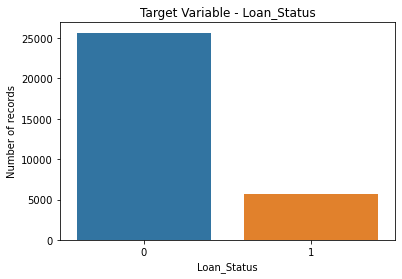

In [317]:
sns.countplot(x='loan_status',data=train)
plt.xlabel('Loan_Status')
plt.ylabel('Number of records')
plt.title('Target Variable - Loan_Status')
plt.show()

In [318]:
cat1=[]
num1=[]
for col in train.columns:
    if col!='loan_status':
        if train[col].dtypes!='object':
            num1.append(col)
        else:
            cat1.append(col)        

In [319]:
len(cat1), len(num1)

(11, 84)

Out of 95 different features, 11 are categorical and 84 features are numerical type.

# Univariate Analysis - Categorical Variables

In [320]:
cat1

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'region']

In [321]:
train['term'].value_counts(1)

36_months    0.726687
60_months    0.273313
Name: term, dtype: float64

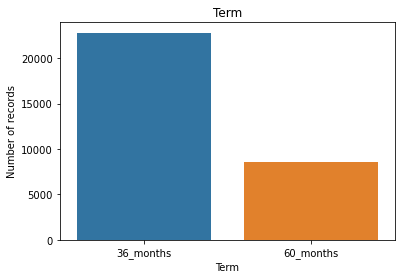

In [322]:
sns.countplot(x='term',data=train)
plt.xlabel('Term')
plt.ylabel('Number of records')
plt.title('Term')
plt.show()
    

Most of the applicants opt for 3 years loan period (73%) which looks a good period for repayment and others(27%) opt for 5 years loan period 

In [323]:
train['grade'].value_counts(1)

B    0.277748
C    0.264986
A    0.218950
D    0.174446
E    0.050853
F    0.010943
G    0.002074
Name: grade, dtype: float64

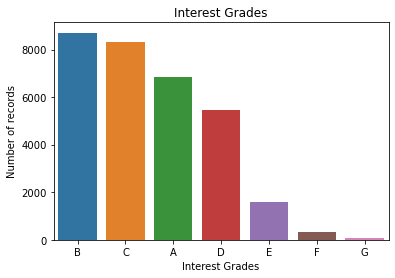

In [324]:
sns.countplot(x=train['grade'],order = train['grade'].value_counts().index)
plt.xlabel('Interest Grades')
plt.ylabel('Number of records')
plt.title('Interest Grades')
plt.show()

The most popular interest rate grade granted by LC is B (27%), while the least popular is G(0.2%)

In [325]:
train['emp_length'].dropna().value_counts(1)

10+ years    0.367671
2 years      0.098829
3 years      0.090567
< 1 year     0.078819
1 year       0.070766
4 years      0.070592
5 years      0.068152
6 years      0.047305
7 years      0.041274
8 years      0.034512
9 years      0.031514
Name: emp_length, dtype: float64

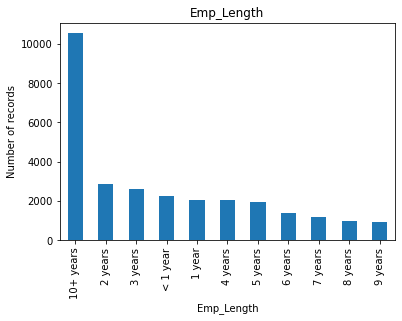

In [326]:
train['emp_length'].dropna().value_counts().plot(kind='bar')
plt.xlabel('Emp_Length')
plt.ylabel('Number of records')
plt.title('Emp_Length')
plt.show()


1. The majority of the applicants(36%) have been employed for more than 10 years. These applicants can be the people who sincerely repay their complete loan amount and have less chances of defaulting.
2. We surprisingly see that people who have been working for more than 5 years but less than 10 years are the ones who haven't applied for the loans 

In [327]:
train['home_ownership'].value_counts(1) 

MORTGAGE    0.501069
RENT        0.363184
OWN         0.135715
ANY         0.000032
Name: home_ownership, dtype: float64

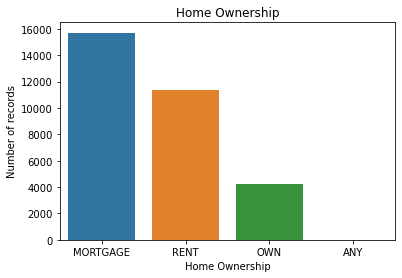

In [328]:
sns.countplot(x=train['home_ownership'],order = train['home_ownership'].value_counts().index)
plt.xlabel('Home Ownership')
plt.ylabel('Number of records')
plt.title('Home Ownership')
plt.show()

50% of loan applicants have already mortgaged their houses against some or the other loans. This makes them strong contender for not replaying the loan back and hence Defaulters

In [329]:
train['verification_status'].value_counts(1)
 

Source Verified    0.401021
Not Verified       0.360440
Verified           0.238539
Name: verification_status, dtype: float64

63% of applicants income source / income is verified by LC. There is a chance that the applicants whose income is not verified might default

In [330]:
train['issue_d'].value_counts(1)

Jan-2018    0.243292
Mar-2018    0.199649
Apr-2018    0.189695
Feb-2018    0.189536
May-2018    0.177827
Name: issue_d, dtype: float64

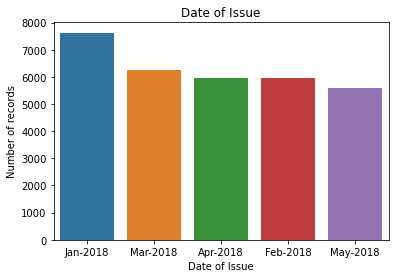

In [331]:
sns.countplot(x=train['issue_d'],order = train['issue_d'].value_counts().index)
plt.xlabel('Date of Issue')
plt.ylabel('Number of records')
plt.title('Date of Issue')
plt.show()

Maximum loans were issued by LC in the month of January 2018 while the least in June 2018. This variable actually will not play as such part in Defaulters analysis and was used only for EDA purpose and can be dropped during modeling.


In [332]:
train['purpose'].value_counts(1)


debt_consolidation    0.504801
credit_card           0.195661
other                 0.102058
home_improvement      0.081193
major_purchase        0.033498
medical               0.019588
house                 0.019525
car                   0.014165
small_business        0.011421
vacation              0.008933
moving                0.008518
renewable_energy      0.000574
wedding               0.000064
Name: purpose, dtype: float64

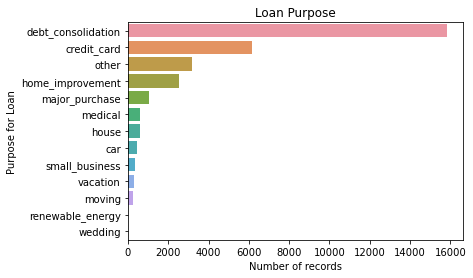

In [333]:
sns.countplot(y=train['purpose'],order = train['purpose'].value_counts().index)
plt.ylabel('Purpose for Loan')
plt.xlabel('Number of records')
plt.title('Loan Purpose')
plt.show()

50% of loan applications are for debt consolidation. Applicants will be using this loan to repay their old debts.There is a chance that these kind of applicants might become defaulter as they are struggling to clear their old debts.

In [334]:
train['initial_list_status'].value_counts(1)

w    0.81828
f    0.18172
Name: initial_list_status, dtype: float64

In [335]:
train['application_type'].value_counts(1)

Individual    0.878003
Joint App     0.121997
Name: application_type, dtype: float64

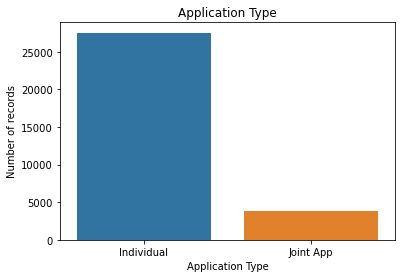

In [336]:
sns.countplot(x=train['application_type'],order = train['application_type'].value_counts().index)
plt.xlabel('Application Type')
plt.ylabel('Number of records')
plt.title('Application Type')
plt.show()

87% of the applicants are individual applicant and only 12% are joint applicants. We can assume that joint applicants are at a lower risk of defaulting as if one applicant is unable to repay, other can step in to clear the loan

In [337]:
train['verification_status_joint'].value_counts(1)
 

NA                 0.878003
Not Verified       0.053852
Source Verified    0.040676
Verified           0.027468
Name: verification_status_joint, dtype: float64

This feature speaks about the income verification status for joint applicants. Not verified status is high and hence high chance of default

In [338]:
train['region'].value_counts(1)

South        0.361110
West         0.285564
Northeast    0.186058
Midwest      0.167268
Name: region, dtype: float64

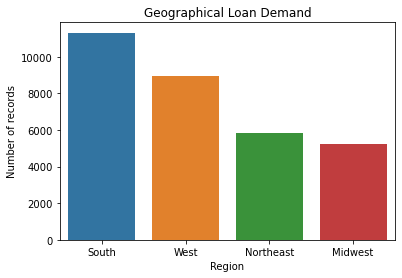

In [339]:
sns.countplot(x=train['region'],order = train['region'].value_counts().index)
plt.xlabel('Region')
plt.ylabel('Number of records')
plt.title('Geographical Loan Demand')
plt.show()

Majority of the applicants(36%) are from south USA. It so happens that most of the working class of USA lives in South and West of USA and also many companies are in California, Texas, etc. Hence the high number of applications

# Univariate Analysis -Numerical Variable

loan_amnt


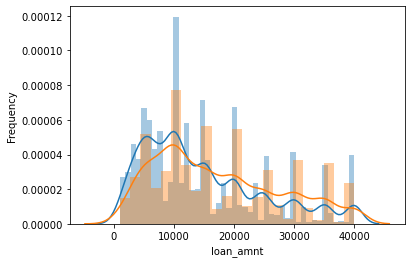

int_rate


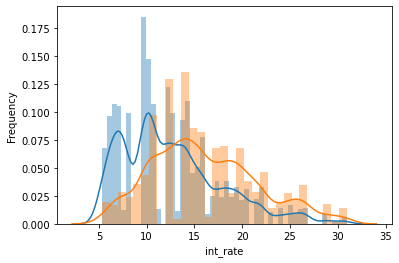

installment


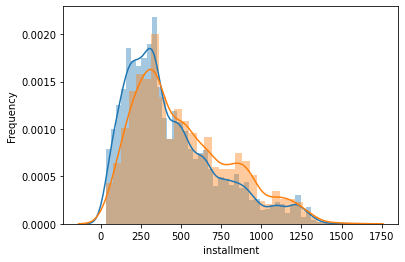

annual_inc


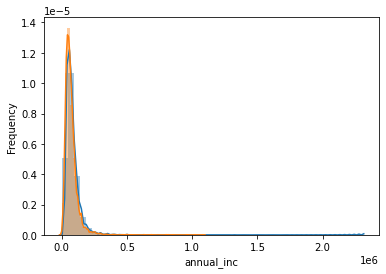

dti


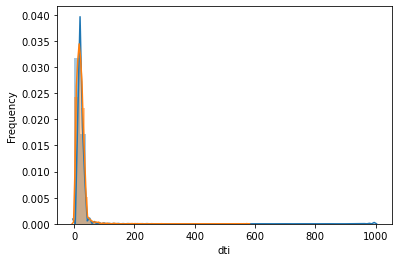

delinq_2yrs


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

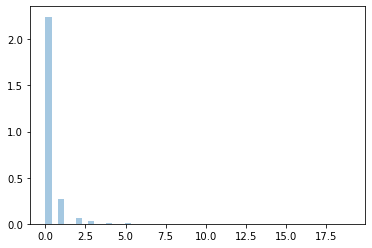

In [340]:
for col in num1:
    print(col)
    sns.distplot((train.loc[train['loan_status']==0,col]).dropna())
    sns.distplot((train.loc[train['loan_status']==1,col]).dropna())
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

1. None of the numerical features follow a normal distribution. This is a real time data and for further analysis, we will have to do transformations and scaling
2. Also from the distplots, we observe that most of the features are non significant. But we cannot depend on the visualizations and shall perform the statistical tests to conclude on the following
3. Few notable observations of some features which we consider to be important in the initial stage:
- a. The loan amount sees a peak at the $10000 for both Defaulters and non defaulters
- b. The mean interest rate for Non defaulters is approximately 10% and for Defaulters is 15%. Thus, we can say that high interest rate leads to possible default.
- c. The dti ratio,as it should be are low for most of the applicants except a few. There are chances that these are the default cases
- d. The revolving utilization rate mean for Non defaulters is somewhere around 30 while that for defaulters is around 50 because lower the utilization rate better for credit score
- e. Interestingly , the installment account utlilization rates and all accounts util rate are almost same for both groups
- f. The curve is uniform for the bankcard utilization rates indicating that the credit limits and the balance for the applicants is almost the same
- g. Two possible groups are observed with regards to oldest accounts opened: before 100 months and after 100 months
- h. Maximum accounts are opened in the year between 1980 to 2018

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Bivariate Analysis - Numerical

### Correlation Matrix

In [ ]:
corr_matrix = train.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation

In [ ]:
corr_matrix

Pairs having correlation greater than 0.95 are as below:

In [ ]:
sol[sol[:]>0.95]

In [ ]:
sol[sol[:]>0.95].count()

In [ ]:
plt.figure(figsize=[12,8])
matrix = np.triu(train.corr())
sns.heatmap(train.corr(),mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'Greens')
plt.show()

1. High correlations are observed between the features pertaining to the joint accounts.
2. High correlations among the number of total accounts, number of active accounts, number of revolving accounts and installment accounts. These features explain the number of various types of accounts the applicant has.
3. High correlations in the credit limits and bal details. This is obvious as balance is the amount owed and credit is the maximum available limit that can be borrowed. As balance increases, credit decreases.
4. High correlation among the features related to number of delinquencies/derogations/records and the time span when they have occurred.
5. The features are not very highly correlated with the target though.

# Post EDA dropping the below columns.
1. Numerical - earliest_cr_line_year, sec_app_earliest_cr_line_year
2. Categorical - issue_d
3. Also dropping grade as it gives details similar to interest rate

In [341]:
num=['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'revol_bal_joint',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog']

In [342]:
cat=['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'region']

# Checking the outliers and capping / dropping them

In [343]:
outliers=["annual_inc",
"dti",
"mths_since_last_delinq",
"revol_bal",
"total_bal_il",
"max_bal_bc",
"total_rev_hi_lim",
"inq_last_12m",
"avg_cur_bal",
"mths_since_rcnt_il",
"mort_acc",
"total_bal_ex_mort",
"total_il_high_credit_limit"]


In [344]:

for col in outliers:
    percentiles = X_train[col].quantile([0.01,0.99]).values
    X_train[col] = np.clip(X_train[col], percentiles[0], percentiles[1])



# Further Analysis

In [345]:
X_num=X_train[num]

In [346]:
X_test_num=X_test[num]

In [347]:
X_cat=X_train[cat]

In [348]:
X_test_cat=X_test[cat]

In [349]:
X_num.shape, X_cat.shape

((31345, 82), (31345, 9))

In [350]:
X_test_num.shape, X_test_cat.shape

((3995, 82), (3995, 9))

# Applying Yeo Johnson to reduce the skewness and also internally transforming and scaling the features for further analysis 

In [351]:
from sklearn.preprocessing import PowerTransformer

In [352]:
pt=PowerTransformer()

In [353]:
X_numt=pt.fit_transform(X_num)

In [354]:
X_numt=pd.DataFrame(X_numt) #Converting array in dataframe

In [355]:
X_numt.columns=X_num.columns

In [356]:
X_numt.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,-1.581901,-0.475509,-1.617098,1.352850,-1.220302,-0.419833,-0.814122,-0.881705,-0.426583,-0.992227,...,-0.372703,-0.372754,-0.372712,-0.372749,-0.372525,-0.372677,-0.372744,-0.372758,-0.372758,-0.211327
1,0.410838,0.726480,0.687322,0.291556,0.112822,2.377287,-0.814122,0.705768,-0.426583,-0.266579,...,-0.372703,-0.372754,-0.372712,-0.372749,-0.372525,-0.372677,-0.372744,-0.372758,-0.372758,-0.211327
2,0.496268,1.949880,0.535236,-1.145992,0.355273,-0.419833,1.045938,1.329013,-0.426583,-0.484969,...,2.685474,2.670563,2.718855,2.677777,2.700258,2.711735,2.660294,2.682662,2.682597,4.733383
3,-0.078582,-0.361231,0.025956,-0.037170,-0.087298,-0.419833,-0.814122,-0.881705,-0.426583,-1.294079,...,-0.372703,-0.372754,-0.372712,-0.372749,-0.372525,-0.372677,-0.372744,-0.372758,-0.372758,-0.211327
4,-0.909891,-1.185099,-0.927799,2.261595,0.883519,-0.419833,1.045938,-0.881705,-0.426583,1.879045,...,-0.372703,-0.372754,-0.372712,-0.372749,-0.372525,-0.372677,-0.372744,-0.372758,-0.372758,-0.211327


#### Tranforming test set

In [357]:
X_test_numt=pt.transform(X_test_num)

In [358]:
X_test_numt=pd.DataFrame(X_test_numt)

In [359]:
X_test_numt.columns=X_test_num.columns

In [360]:
X_numt['loan_status']=y_train

In [361]:
X_numt.shape

(31345, 83)

In [362]:
X_numt.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,loan_status
0,-1.581901,-0.475509,-1.617098,1.352850,-1.220302,-0.419833,-0.814122,-0.881705,-0.426583,-0.992227,...,-0.372754,-0.372712,-0.372749,-0.372525,-0.372677,-0.372744,-0.372758,-0.372758,-0.211327,0
1,0.410838,0.726480,0.687322,0.291556,0.112822,2.377287,-0.814122,0.705768,-0.426583,-0.266579,...,-0.372754,-0.372712,-0.372749,-0.372525,-0.372677,-0.372744,-0.372758,-0.372758,-0.211327,0
2,0.496268,1.949880,0.535236,-1.145992,0.355273,-0.419833,1.045938,1.329013,-0.426583,-0.484969,...,2.670563,2.718855,2.677777,2.700258,2.711735,2.660294,2.682662,2.682597,4.733383,1
3,-0.078582,-0.361231,0.025956,-0.037170,-0.087298,-0.419833,-0.814122,-0.881705,-0.426583,-1.294079,...,-0.372754,-0.372712,-0.372749,-0.372525,-0.372677,-0.372744,-0.372758,-0.372758,-0.211327,0
4,-0.909891,-1.185099,-0.927799,2.261595,0.883519,-0.419833,1.045938,-0.881705,-0.426583,1.879045,...,-0.372754,-0.372712,-0.372749,-0.372525,-0.372677,-0.372744,-0.372758,-0.372758,-0.211327,0


### Removing same columns from test

In [363]:
X_test_numt.shape

(3995, 82)

In [364]:
X_numt.drop('loan_status',axis=1,inplace=True)

# Encoding the Categorical Variables

In [365]:
X_cat.head()

,term,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type,verification_status_joint,region
0,36_months,10+ years,MORTGAGE,Source Verified,home_improvement,w,Individual,NA,South
1,36_months,10+ years,RENT,Not Verified,debt_consolidation,w,Individual,NA,Northeast
2,60_months,4 years,MORTGAGE,Source Verified,debt_consolidation,w,Joint App,Source Verified,South
3,36_months,3 years,RENT,Source Verified,debt_consolidation,w,Individual,NA,Midwest
4,36_months,5 years,MORTGAGE,Source Verified,debt_consolidation,w,Individual,NA,South


1. Emp_length is ordinal variables and hence we can do manual / label encoding.
2. Remaining are nominal and hence we use dummies / manual / one hot encoding

In [366]:
#emp_lenght 10+>9>8>7>6>5>4>3>2>1>
X_cat['emp_length'].replace({'10+ years':11, '4 years':5, '3 years':4, '5 years':6, '9 years':10, '6 years':7,
       '2 years':3, '< 1 year':1, '1 year':2, '7 years':8, '8 years':9},inplace=True)

In [367]:
X_test_cat['emp_length'].replace({'10+ years':11, '4 years':5, '3 years':4, '5 years':6, '9 years':10, '6 years':7,
       '2 years':3, '< 1 year':1, '1 year':2, '7 years':8, '8 years':9},inplace=True)

In [368]:
#term , Initial_list_status,application_type
X_cat['term'].replace({'36_months':1,'60_months':0},inplace=True)
X_cat['initial_list_status'].replace({'w':1,'f':0},inplace=True)
X_cat['application_type'].replace({'Individual':1,'Joint App':0},inplace=True)

In [369]:
X_test_cat['term'].replace({'36_months':1,'60_months':0},inplace=True)
X_test_cat['initial_list_status'].replace({'w':1,'f':0},inplace=True)
X_test_cat['application_type'].replace({'Individual':1,'Joint App':0},inplace=True)

In [370]:
from sklearn.preprocessing import OneHotEncoder

In [371]:
ohe=OneHotEncoder()

In [372]:
X_ohe=ohe.fit_transform(X_cat[['home_ownership','verification_status','purpose','verification_status_joint','region']]).toarray()

In [373]:
X_test_ohe=ohe.transform(X_test_cat[['home_ownership','verification_status','purpose','verification_status_joint','region']]).toarray()

In [374]:
X_ohe

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [375]:
X_ohe=pd.DataFrame(X_ohe,columns=ohe.get_feature_names())

In [376]:
X_test_ohe=pd.DataFrame(X_test_ohe,columns=ohe.get_feature_names())

In [377]:
X_cat=pd.concat([X_cat,X_ohe],axis=1)

In [378]:
X_test_cat=pd.concat([X_test_cat,X_test_ohe],axis=1)

In [379]:
X_cat.drop(['home_ownership','verification_status','purpose','verification_status_joint','region'],axis=1,inplace=True)

In [380]:
X_test_cat.drop(['home_ownership','verification_status','purpose','verification_status_joint','region'],axis=1,inplace=True)

In [381]:
X_cat.head()

,term,emp_length,initial_list_status,application_type,x0_ANY,x0_MORTGAGE,x0_OWN,x0_RENT,x1_Not Verified,x1_Source Verified,...,x2_vacation,x2_wedding,x3_NA,x3_Not Verified,x3_Source Verified,x3_Verified,x4_Midwest,x4_Northeast,x4_South,x4_West
0,1,11.0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,11.0,1,1,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,5.0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,4.0,1,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,6.0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [382]:
X_test_cat.head()

,term,emp_length,initial_list_status,application_type,x0_ANY,x0_MORTGAGE,x0_OWN,x0_RENT,x1_Not Verified,x1_Source Verified,...,x2_vacation,x2_wedding,x3_NA,x3_Not Verified,x3_Source Verified,x3_Verified,x4_Midwest,x4_Northeast,x4_South,x4_West
0,1,2.0,1,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,7.0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,4.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,11.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,10.0,1,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Scaling the Categorical Data - Ordinal Data

In [383]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [384]:
X_cats=ss.fit_transform(X_cat[['emp_length']])

In [385]:
X_cats=pd.DataFrame(X_cats)

In [386]:
X_cats=pd.concat([X_cat,X_cats],axis=1)

In [387]:
X_cats.drop('emp_length',axis=1,inplace=True)

In [388]:
X_cats.rename(columns={0:'emp_length'},inplace=True)

In [389]:
X_cats.head()

,term,initial_list_status,application_type,x0_ANY,x0_MORTGAGE,x0_OWN,x0_RENT,x1_Not Verified,x1_Source Verified,x1_Verified,...,x2_wedding,x3_NA,x3_Not Verified,x3_Source Verified,x3_Verified,x4_Midwest,x4_Northeast,x4_South,x4_West,emp_length
0,1,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.088199
1,1,1,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.088199
2,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.532924
3,1,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.803111
4,1,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.262737


### TEst Data

In [390]:
X_test_cats=ss.transform(X_test_cat[['emp_length']])

In [391]:
X_test_cats=pd.DataFrame(X_test_cats)

In [392]:
X_test_cats=pd.concat([X_test_cat,X_test_cats],axis=1)

In [393]:
X_test_cats.drop('emp_length',axis=1,inplace=True)

In [394]:
X_test_cats.rename(columns={0:'emp_length'},inplace=True)

In [395]:
cats=list(X_cats.columns)

In [396]:
len(cats)

32

# Joining the Numerical and Categorical Xs

In [397]:
X_train_new=pd.concat([X_numt,X_cats],axis=1)

In [398]:
X_test_new=pd.concat([X_test_numt,X_test_cats],axis=1)

In [399]:
X_train_new.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,x2_wedding,x3_NA,x3_Not Verified,x3_Source Verified,x3_Verified,x4_Midwest,x4_Northeast,x4_South,x4_West,emp_length
0,-1.581901,-0.475509,-1.617098,1.352850,-1.220302,-0.419833,-0.814122,-0.881705,-0.426583,-0.992227,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.088199
1,0.410838,0.726480,0.687322,0.291556,0.112822,2.377287,-0.814122,0.705768,-0.426583,-0.266579,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.088199
2,0.496268,1.949880,0.535236,-1.145992,0.355273,-0.419833,1.045938,1.329013,-0.426583,-0.484969,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.532924
3,-0.078582,-0.361231,0.025956,-0.037170,-0.087298,-0.419833,-0.814122,-0.881705,-0.426583,-1.294079,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.803111
4,-0.909891,-1.185099,-0.927799,2.261595,0.883519,-0.419833,1.045938,-0.881705,-0.426583,1.879045,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.262737


In [400]:
X_train_new.shape

(31345, 114)

In [401]:
X_test_new.shape

(3995, 114)

In [402]:
X_test_new.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,x2_wedding,x3_NA,x3_Not Verified,x3_Source Verified,x3_Verified,x4_Midwest,x4_Northeast,x4_South,x4_West,emp_length
0,-0.134877,-1.185099,-0.098624,0.446851,-1.659299,-0.419833,-0.814122,-0.881705,-0.426583,-0.484969,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.343485
1,-0.909891,1.554290,-0.667399,0.196538,1.331714,-0.419833,-0.814122,1.448230,-0.426583,-0.066039,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.007450
2,-0.314658,1.261779,-0.036558,-1.674438,2.738082,-0.419833,-0.814122,-0.881705,-0.426583,-0.066039,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.803111
3,1.017399,0.155264,1.264551,0.550256,0.583615,2.377287,-0.814122,0.991162,-0.426583,0.292415,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.088199
4,-0.314658,0.415851,-0.151014,-0.093420,0.695767,-0.419833,-0.814122,-0.881705,-0.426583,-0.266579,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.818012


# Imputing missing values with KNN imputer

In [403]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [404]:
X_imp=impute.fit_transform(X_train_new)

In [405]:
X_test_imp=impute.transform(X_test_new)

In [406]:
X_train_imp=pd.DataFrame(X_imp)

In [407]:
X_test_imp=pd.DataFrame(X_test_imp)

In [408]:
X_train_imp.columns=X_train_new.columns

In [409]:
X_test_imp.columns=X_test_new.columns

In [410]:
X_train_imp.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,x2_wedding,x3_NA,x3_Not Verified,x3_Source Verified,x3_Verified,x4_Midwest,x4_Northeast,x4_South,x4_West,emp_length
0,-1.581901,-0.475509,-1.617098,1.352850,-1.220302,-0.419833,-0.814122,-0.881705,-0.426583,-0.992227,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.088199
1,0.410838,0.726480,0.687322,0.291556,0.112822,2.377287,-0.814122,0.705768,-0.426583,-0.266579,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.088199
2,0.496268,1.949880,0.535236,-1.145992,0.355273,-0.419833,1.045938,1.329013,-0.426583,-0.484969,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.532924
3,-0.078582,-0.361231,0.025956,-0.037170,-0.087298,-0.419833,-0.814122,-0.881705,-0.426583,-1.294079,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.803111
4,-0.909891,-1.185099,-0.927799,2.261595,0.883519,-0.419833,1.045938,-0.881705,-0.426583,1.879045,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.262737


In [411]:
X_test_imp.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,x2_wedding,x3_NA,x3_Not Verified,x3_Source Verified,x3_Verified,x4_Midwest,x4_Northeast,x4_South,x4_West,emp_length
0,-0.134877,-1.185099,-0.098624,0.446851,-1.659299,-0.419833,-0.814122,-0.881705,-0.426583,-0.484969,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.343485
1,-0.909891,1.554290,-0.667399,0.196538,1.331714,-0.419833,-0.814122,1.448230,-0.426583,-0.066039,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.007450
2,-0.314658,1.261779,-0.036558,-1.674438,2.738082,-0.419833,-0.814122,-0.881705,-0.426583,-0.066039,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.803111
3,1.017399,0.155264,1.264551,0.550256,0.583615,2.377287,-0.814122,0.991162,-0.426583,0.292415,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.088199
4,-0.314658,0.415851,-0.151014,-0.093420,0.695767,-0.419833,-0.814122,-0.881705,-0.426583,-0.266579,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.818012


In [412]:
X_train_imp.isnull().sum()[X_train_imp.isnull().sum()!=0]

Series([], dtype: int64)

# Base Model Fitting

In [441]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [442]:
lr = LogisticRegression()
kfold=KFold(n_splits=5,random_state=42,shuffle=True)
cv_results = cross_val_score(lr, X_train_imp, y_train, cv=kfold, scoring ='f1_weighted')
print(np.mean(cv_results), cv_results.var())

0.7632371205343593 1.8678835718256103e-05


In [443]:
rfc = RandomForestClassifier()
kfold=KFold(n_splits=5,random_state=42,shuffle=True)
cv_results = cross_val_score(rfc, X_train_imp, y_train, cv=kfold, scoring ='f1_weighted')
print(np.mean(cv_results), cv_results.var())

0.7509004249546547 2.6873811731438622e-05


# Best Model

In [444]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

In [446]:
kbest1=SelectKBest(k=80)
pipeline1=Pipeline(steps=[('KBEST',kbest1),('LR',lr)])

kfold=KFold(n_splits=5,random_state=42,shuffle=True)
cv_results = cross_val_score(pipeline1, X_train_imp, y_train, cv=kfold)
print(np.mean(cv_results), cv_results.var())

0.8199712872866487 6.621822125247196e-06


In [420]:
pipeline1.fit(X_train_imp,y_train)

Pipeline(steps=[('KBEST', SelectKBest(k=80)), ('LR', LogisticRegression())])

In [421]:
y_pred=pipeline1.predict(X_test_imp)

In [422]:
y_train_pred=pipeline1.predict(X_train_imp)

from sklearn.metrics import classification_report

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     25657
           1       0.55      0.09      0.15      5688

    accuracy                           0.82     31345
   macro avg       0.69      0.54      0.53     31345
weighted avg       0.78      0.82      0.76     31345

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3462
           1       0.58      0.10      0.17       533

    accuracy                           0.87      3995
   macro avg       0.73      0.54      0.55      3995
weighted avg       0.84      0.87      0.83      3995



# The best model is SelectKBest (80 features) with LR

1. Accuracy - 82% - Train , 87% - Test
2. Recall for minority is the best in all the other models (0.09)
3. We need to consider and focus on Recall of minority class as the model has to predict Defaulters correctly
4. To further improve the recall and thus the F1 score, we shall check the upsampling and downsampling

# Downsampling:

In [423]:
Xytrain=pd.concat([X_train_imp,y_train],axis=1) 
print('Before undersampling: ','\n',Xytrain['loan_status'].value_counts())

Before undersampling:  
 0    25657
1     5688
Name: loan_status, dtype: int64


In [424]:
Xytrain0=Xytrain.loc[Xytrain['loan_status']==0]
Xytrain1=Xytrain.loc[Xytrain['loan_status']==1]

len0=len(Xytrain0)
len1=len(Xytrain1)

Xytrain0_us=Xytrain0.sample(len1,random_state=42)

Xytrain_us=pd.concat([Xytrain1,Xytrain0_us],axis=0)

In [425]:
print('After undersampling: ','\n',Xytrain_us['loan_status'].value_counts())

After undersampling:  
 1    5688
0    5688
Name: loan_status, dtype: int64


In [426]:
X_train_us=Xytrain_us.drop('loan_status',axis=1)
y_train_us=Xytrain_us['loan_status']

In [427]:
pipeline1.fit(X_train_us,y_train_us)

y_train_pred=pipeline1.predict(X_train_us)

y_pred=pipeline1.predict(X_test_imp)

print('Train:','\n',classification_report(y_train_us,y_train_pred))
print('Test:','\n',classification_report(y_test,y_pred))

Train: 
               precision    recall  f1-score   support

           0       0.68      0.66      0.67      5688
           1       0.67      0.69      0.68      5688

    accuracy                           0.68     11376
   macro avg       0.68      0.68      0.68     11376
weighted avg       0.68      0.68      0.68     11376

Test: 
               precision    recall  f1-score   support

           0       0.93      0.67      0.78      3462
           1       0.24      0.69      0.36       533

    accuracy                           0.67      3995
   macro avg       0.59      0.68      0.57      3995
weighted avg       0.84      0.67      0.72      3995



In [428]:
kfold=KFold(n_splits=5,random_state=42,shuffle=True)
cv_results = cross_val_score(pipeline1, X_train_us, y_train_us, cv=kfold)
print(np.mean(cv_results), cv_results.var())

0.6697435639931246 9.950074045822007e-05


# Oversampling

In [429]:
Xytrain=pd.concat([X_train_imp,y_train],axis=1)
print('Before oversampling: ','\n',Xytrain['loan_status'].value_counts())


Before oversampling:  
 0    25657
1     5688
Name: loan_status, dtype: int64


In [430]:
Xytrain0=Xytrain.loc[Xytrain['loan_status']==0]
Xytrain1=Xytrain.loc[Xytrain['loan_status']==1]



In [431]:
len0=len(Xytrain0)
len1=len(Xytrain1)



In [432]:
Xytrain1_os=Xytrain1.sample(len0,replace=True,random_state=3)

Xytrain_os=pd.concat([Xytrain0,Xytrain1_os],axis=0)

print('After oversampling: ','\n',Xytrain_os['loan_status'].value_counts())



After oversampling:  
 1    25657
0    25657
Name: loan_status, dtype: int64


In [433]:
#splitting data in train and test:

X_train_os=Xytrain_os.drop('loan_status',axis=1)
y_train_os=Xytrain_os['loan_status']

In [434]:
pipeline1.fit(X_train_os,y_train_os)

y_train_pred=pipeline1.predict(X_train_os)

y_pred=pipeline1.predict(X_test_imp)

print('Train:','\n',classification_report(y_train_os,y_train_pred))
print('Test:','\n',classification_report(y_test,y_pred))

Train: 
               precision    recall  f1-score   support

           0       0.68      0.66      0.67     25657
           1       0.67      0.69      0.68     25657

    accuracy                           0.68     51314
   macro avg       0.68      0.68      0.68     51314
weighted avg       0.68      0.68      0.68     51314

Test: 
               precision    recall  f1-score   support

           0       0.93      0.67      0.78      3462
           1       0.24      0.68      0.36       533

    accuracy                           0.67      3995
   macro avg       0.59      0.68      0.57      3995
weighted avg       0.84      0.67      0.72      3995



In [435]:
kfold=KFold(n_splits=5,random_state=42,shuffle=True)
cv_results = cross_val_score(pipeline1, X_train_os, y_train_os, cv=kfold)
print(np.mean(cv_results), cv_results.var())

0.6745136490498677 1.1723605295731012e-05


In [436]:
dfscores = pd.DataFrame(kbest1.scores_)
dfcolumns = pd.DataFrame(X_train_imp.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(10,'Score'))

In [437]:
featureScores.nlargest(80,'Score')

,Specs,Score
1,int_rate,5654.456634
68,tot_hi_cred_lim,1588.077501
46,mort_acc,1378.142782
82,term,1335.530185
20,tot_cur_bal,1300.948226
86,x0_MORTGAGE,1234.218759
37,avg_cur_bal,1094.477505
2,installment,1081.004275
88,x0_RENT,1049.806395
0,loan_amnt,968.405229
